In [51]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm
from eistrick import eis_slit_width_offset

In [22]:
eis_data_set = scipy.io.readsav("../../save/new_lvl1_offset_limb_1116_northpole_tilt_cor_l1_20071116_07262.sav",verbose=False)
eis_wvl =  eis_data_set["wvl"]
eis_img = eis_data_set["new_data_offset"]
eis_err = eis_data_set["new_err_offset"]
eis_img_aver = np.average(eis_img,axis=0)
eis_err_aver = np.sqrt(np.sum(np.square(eis_err),axis=0))/7
eis_range = (372,402)

In [5]:
eis_img.shape

(7, 534, 4096)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


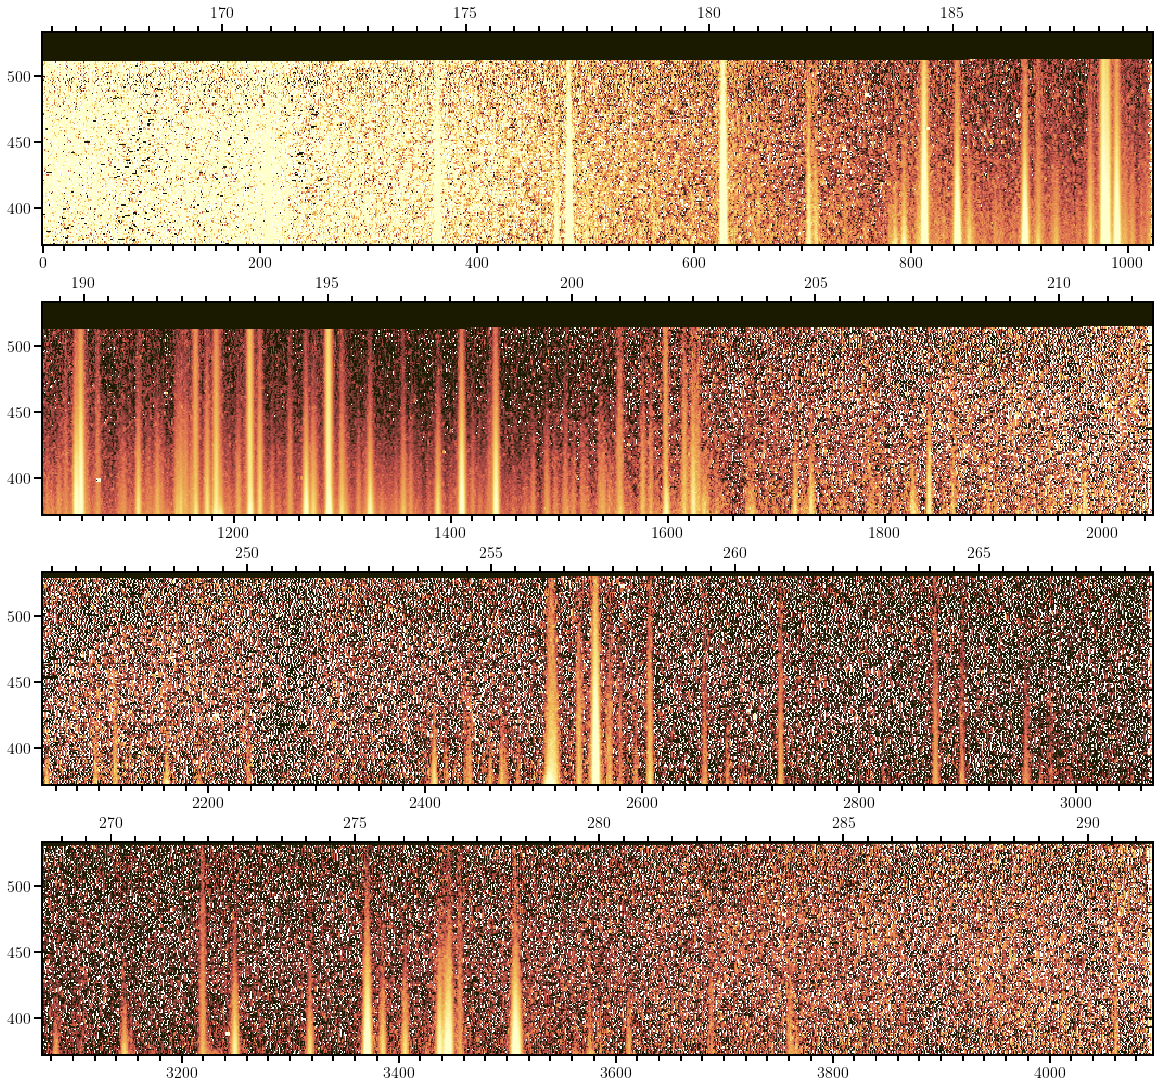

In [38]:
fig, axes = plt.subplots(4,1,figsize=(16,15),constrained_layout=True)

for ii in range(4):
    axes[ii].pcolormesh(np.arange(ii*1024,(ii+1)*1024),np.arange(372,534),
                    np.nan_to_num(np.log10(eis_img_aver[372:,ii*1024:(ii+1)*1024]),nan=-np.inf),
                    cmap=cmcm.lajolla_r,shading="auto",vmin=0,vmax=2.5)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(eis_wvl[ii*1024],eis_wvl[(ii+1)*1024-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=16)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)



FWHM after removing instrumental broadening:  [0.04619733]


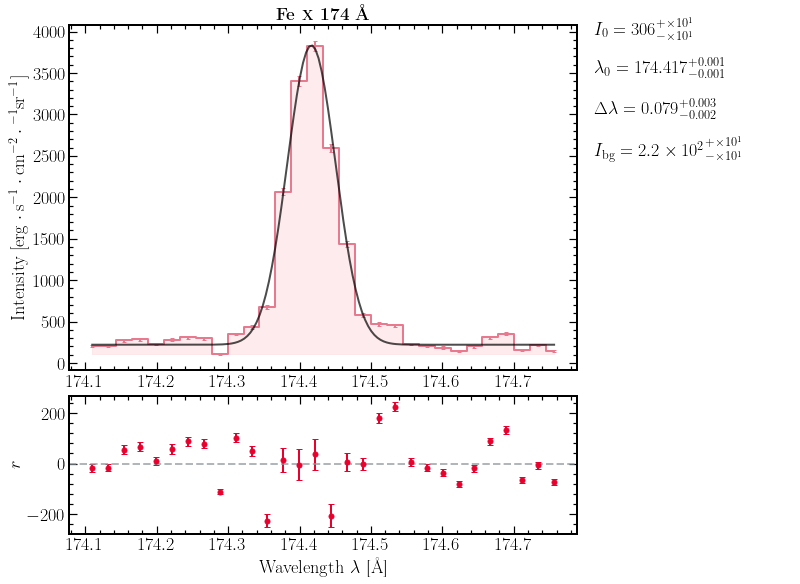

In [52]:
FeX_174_slice = (350,380)
wvl_FeX_174 = eis_wvl[FeX_174_slice[0]:FeX_174_slice[1]]
int_FeX_174 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeX_174_slice[0]:FeX_174_slice[1]],axis=0)

err_FeX_174 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeX_174_slice[0]:FeX_174_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeX_174_fit_model = SpectrumFitSingle(data=int_FeX_174,wvl=wvl_FeX_174,err=err_FeX_174,
                                      same_width=True,line_number=1,line_wvl_init=[174.4],
                                      int_max_init=[3500],fwhm_init=[0.2])
# FeX_174_fit_model.plot(plot_fit=False,plot_params=False)
FeX_174_fit_model.run_HahnMC(n_chain=10000)
FeX_174_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 174 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeX_174_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeX_174_fit_model.line_wvl_fit,eis_wvl[0])**2))

In [53]:
eis_slit_width_offset(387,2,FeX_174_fit_model.line_wvl_fit,eis_wvl[0])

array([0.06459612])

FWHM after removing instrumental broadening:  [0.00743725 0.04850273]


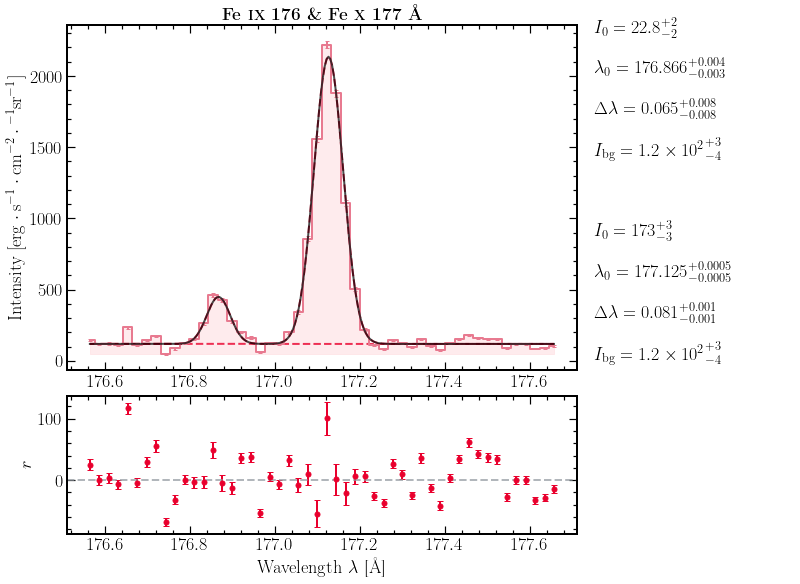

In [54]:
FeIX_176_FeX_177_slice = (460,510)
wvl_FeIX_176_FeX_177 = eis_wvl[FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]
int_FeIX_176_FeX_177 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]],axis=0)

err_FeIX_176_FeX_177 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeIX_176_FeX_177_slice[0]:FeIX_176_FeX_177_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeIX_176_FeX_177_fit_model = SpectrumFitSingle(data=int_FeIX_176_FeX_177,wvl=wvl_FeIX_176_FeX_177,err=err_FeIX_176_FeX_177,
                                      same_width=False,line_number=2,line_wvl_init=[176.9,177.12],
                                      int_max_init=[400,2000],fwhm_init=[0.1,0.1])
# FeIX_176_FeX_177_fit_model.plot(plot_fit=False,plot_params=False)
FeIX_176_FeX_177_fit_model.run_HahnMC(n_chain=10000)
FeIX_176_FeX_177_fit_model.plot(plot_title=r"\textbf{Fe \textsc{ix} 176 \& Fe \textsc{x} 177 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeIX_176_FeX_177_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeIX_176_FeX_177_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.05502878]


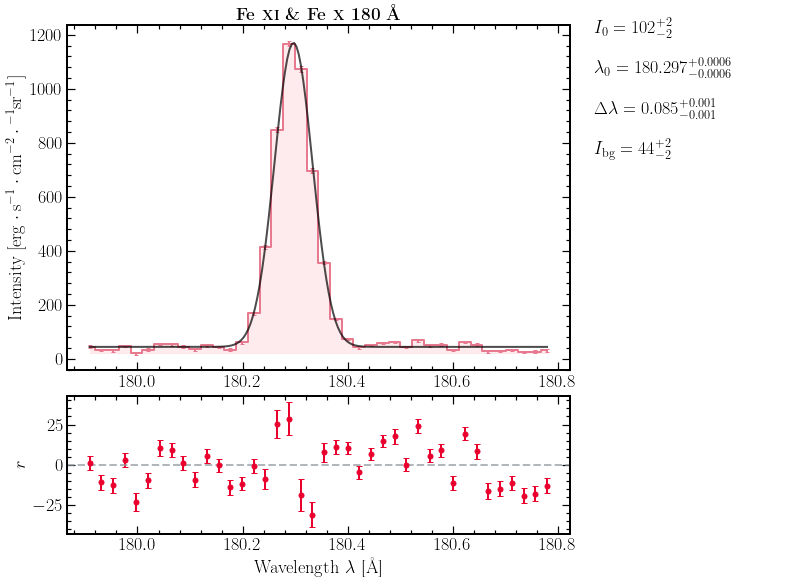

In [55]:
FeXI_FeX_180_slice = (610,650)
wvl_FeXI_FeX_180 = eis_wvl[FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]
int_FeXI_FeX_180 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]],axis=0)

err_FeXI_FeX_180 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_180_slice[0]:FeXI_FeX_180_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_180_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_180,wvl=wvl_FeXI_FeX_180,err=err_FeXI_FeX_180,
                                      same_width=False,line_number=1,line_wvl_init=[180.4],
                                      int_max_init=[1100],fwhm_init=[0.1])
# FeXI_FeX_180_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_180_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_180_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 180 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_180_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXI_FeX_180_fit_model.line_wvl_fit,eis_wvl[0])**2))

FWHM after removing instrumental broadening:  [0.04633854 0.05800178]


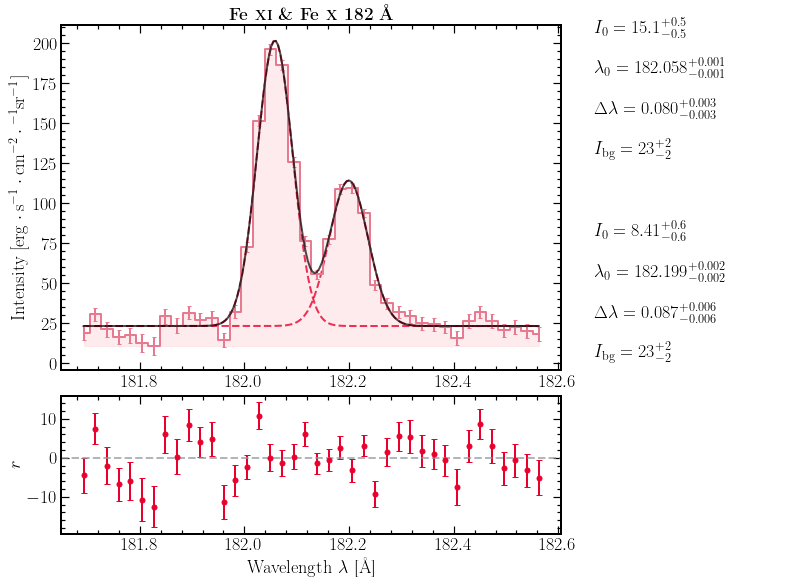

In [60]:
FeXI_FeX_182_slice = (690,730)
wvl_FeXI_FeX_182 = eis_wvl[FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]
int_FeXI_FeX_182 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]],axis=0)

err_FeXI_FeX_182 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        FeXI_FeX_182_slice[0]:FeXI_FeX_182_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

FeXI_FeX_182_fit_model = SpectrumFitSingle(data=int_FeXI_FeX_182,wvl=wvl_FeXI_FeX_182,err=err_FeXI_FeX_182,
                                      same_width=False,line_number=2,line_wvl_init=[182.1,182.2],
                                      int_max_init=[200,100],fwhm_init=[0.1,0.1])
#FeXI_FeX_182_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_FeX_182_fit_model.run_HahnMC(n_chain=10000)
FeXI_FeX_182_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} \& Fe \textsc{x} 182 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXI_FeX_182_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,FeXI_FeX_182_fit_model.line_wvl_fit,eis_wvl[0])**2))

In [ ]:
OVI_184_slice = (760,800)
wvl_OVI_184 = eis_wvl[OVI_184_slice[0]:OVI_184_slice[1]]
int_OVI_184 = np.average(eis_img_aver[eis_range[0]:eis_range[1],
                                    OVI_184_slice[0]:OVI_184_slice[1]],axis=0)

err_OVI_184 = np.sqrt(np.sum(np.square(eis_err_aver[eis_range[0]:eis_range[1],
                        OVI_184_slice[0]:OVI_184_slice[1]]),axis=0))/(eis_range[1]-eis_range[0])

OVI_184_fit_model = SpectrumFitSingle(data=int_OVI_184,wvl=wvl_OVI_184,err=err_OVI_184,
                                      same_width=False,line_number=2,line_wvl_init=[182.1,182.2],
                                      int_max_init=[200,100],fwhm_init=[0.1,0.1])
#OVI_184_fit_model.plot(plot_fit=False,plot_params=False)
OVI_184_fit_model.run_HahnMC(n_chain=10000)
OVI_184_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 184 \mbox{\AA}}",plot_hmc=True,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(OVI_184_fit_model.fwhm_fit_hmc**2 - \
eis_slit_width_offset(387,2,OVI_184_fit_model.line_wvl_fit,eis_wvl[0])**2))